In [46]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import mplfinance as mpl
import mplfinance as mpf
import os
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
api_key = os.environ.get("api_key")
api_secret = os.environ.get("api_secret")

In [3]:
client = Client(api_key, api_secret)

In [4]:
tickers = client.get_all_tickers()

In [5]:
ticker_df = pd.DataFrame(tickers)

In [6]:
ticker_df.set_index('symbol', inplace=True)

In [7]:
display(float(ticker_df.loc['ETHUSDC']['price']))
display(float(ticker_df.loc['BTCUSDT']['price']))

3599.18

54916.61

In [8]:
depth = client.get_order_book(symbol='BTCUSDT')

In [9]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,54922.16000000,1.32858000
1,54923.66000000,0.05675000
2,54923.91000000,0.07101000
3,54925.47000000,0.04625000
4,54926.14000000,0.05156000


In [16]:
btc_daily_data = client.get_historical_klines('BTCUSDC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2021')

In [17]:
btc_daily_df = pd.DataFrame(btc_daily_data)
btc_daily_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [18]:
btc_daily_df['Open Time'] = pd.to_datetime(btc_daily_df['Open Time']/1000, unit='s')
btc_daily_df['Close Time'] = pd.to_datetime(btc_daily_df['Close Time']/1000, unit='s')

In [20]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
btc_daily_df[numeric_columns] = btc_daily_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [23]:
btc_ohlcv_daily = btc_daily_df.iloc[:,0:6]
btc_ohlcv_daily = btc_ohlcv_daily.set_index('Open Time')
btc_ohlcv_daily

,Open,High,Low,Close,Volume
Open Time,,,,,
2021-01-01,28964.54,29680.00,28608.73,29407.93,1736.620480
2021-01-02,29393.99,33500.00,29027.03,32215.18,4227.234681
2021-01-03,32216.13,34851.30,32002.65,33033.26,3523.881120
2021-01-04,33040.00,33648.27,28000.00,32017.58,4218.572357
2021-01-05,32027.11,34498.00,29882.30,34059.70,3150.244271
...,...,...,...,...,...
2021-10-05,49252.59,51921.46,49057.36,51488.94,1382.533040
2021-10-06,51502.83,55794.07,50408.96,55330.92,2133.377701
2021-10-07,55332.46,55352.49,53392.38,53767.81,1434.183730


In [83]:
btc_ohlcv_daily.to_csv("final_code/Resources/daily_btc_ohclv_2021.csv")

In [67]:
historical_minute = client.get_historical_klines('BTCUSDC', Client.KLINE_INTERVAL_1MINUTE, '5 day ago UTC')

In [68]:
hist_min = pd.DataFrame(historical_minute)

In [69]:
hist_min.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [70]:
hist_min['Open Time'] = pd.to_datetime(hist_min['Open Time']/1000, unit='s')
hist_min['Close Time'] = pd.to_datetime(hist_min['Close Time']/1000, unit='s')


In [73]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
hist_min[numeric_columns] = hist_min[numeric_columns].apply(pd.to_numeric, axis=1)

In [76]:
btc_ohlcv_minute = hist_min.iloc[:,0:6]
btc_ohlcv_minute = btc_ohlcv_minute.set_index('Open Time')
btc_ohlcv_minute

,Open,High,Low,Close,Volume
Open Time,,,,,
2021-10-04 18:11:00,49277.81,49300.00,49231.38,49251.86,2.06374
2021-10-04 18:12:00,49246.15,49263.76,49200.90,49200.90,1.88979
2021-10-04 18:13:00,49207.29,49207.29,49124.88,49124.88,0.73246
2021-10-04 18:14:00,49144.35,49191.25,49144.35,49156.88,0.85816
2021-10-04 18:15:00,49155.24,49248.09,49155.24,49213.61,0.54169
...,...,...,...,...,...
2021-10-09 18:06:00,54903.26,54904.36,54894.28,54894.28,0.50955
2021-10-09 18:07:00,54887.08,54887.08,54861.78,54861.87,0.16138
2021-10-09 18:08:00,54861.33,54893.31,54861.33,54880.06,0.17581


In [77]:
btc_ohlcv_minute.to_csv("final_code/Resources/minute_btc_ohclv_2021.csv", index=False)

In [78]:
pwd

'C:\\Users\\julia\\OneDrive\\Desktop\\FinTech\\Projects\\crypto_freq_trade\\Julia'

In [86]:
btc_df = pd.read_csv(Path("final_code/Resources/daily_btc_ohclv_2021.csv"), 
                     index_col= "Open Time")
target_col = 'Close'

In [87]:
btc_df.head()

,Open,High,Low,Close,Volume
Open Time,,,,,
2021-01-01,28964.54,29680.00,28608.73,29407.93,1736.620480
2021-01-02,29393.99,33500.00,29027.03,32215.18,4227.234681
2021-01-03,32216.13,34851.30,32002.65,33033.26,3523.881120
2021-01-04,33040.00,33648.27,28000.00,32017.58,4218.572357
2021-01-05,32027.11,34498.00,29882.30,34059.70,3150.244271


In [112]:
def train_test_split(btc_df, test_size=0.2):
  split_row = len(btc_df) - int(test_size * len(btc_df))
  train_data = btc_df.iloc[:split_row]
  test_data = btc_df.iloc[split_row:]
  return train_data, test_data

train, test = train_test_split(btc_df, test_size=0.2)

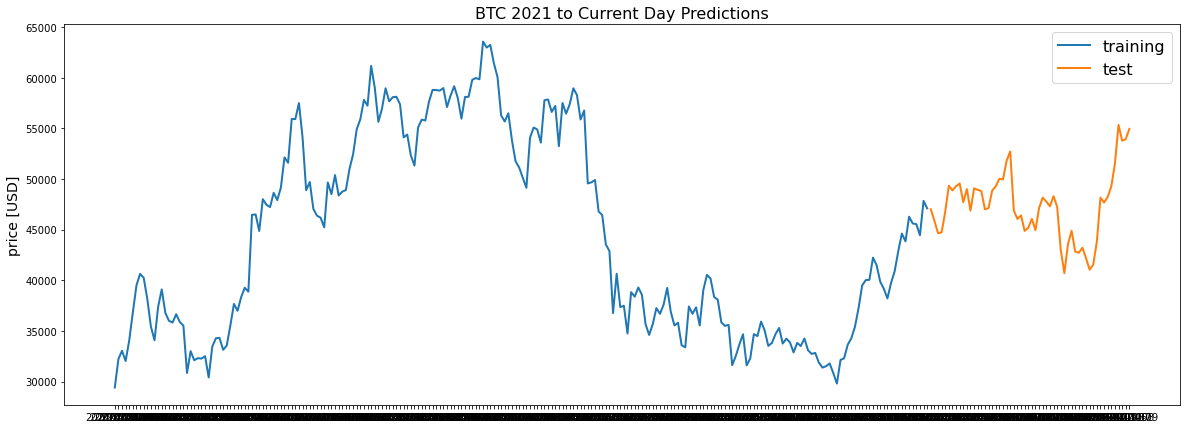

In [126]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(20, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

line_plot(train[target_col], test[target_col], 'training', 'test', title='BTC 2021 to Current Day Predictions')

In [114]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [115]:
def extract_window_data(btc_df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(btc_df) - window_len):
        tmp = btc_df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [116]:
def prepare_data(btc_df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(btc_df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [117]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [118]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [119]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    btc_df, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
7/7 [==============================] - 3s 11ms/step - loss: 0.0106
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 3/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.0044
Epoch 6/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 7/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 8/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 9/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 10/20
7/7 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 11/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 12/20
7/7 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 13/20
7/7 [==============================] - 0s 9ms/step - loss:

In [120]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.036283382440145805

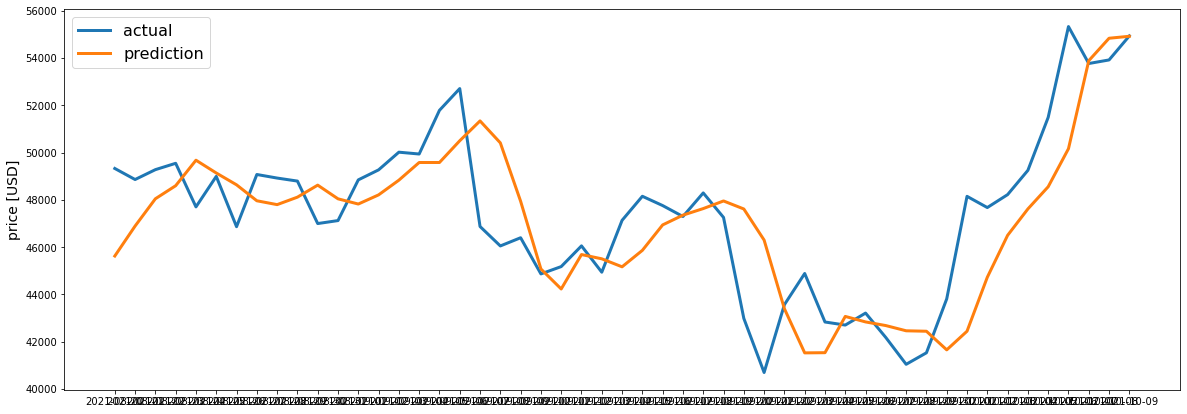

In [121]:
# Plotting predictions against the actual. 
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)